In [1]:
from tensorflow.keras.models import model_from_json

In [2]:
json_file = open('/home/pham.hoang.anh/prj/colorization/model_15_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/home/pham.hoang.anh/prj/colorization/colorization_12_1.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [4]:
import pickle

with open('/home/pham.hoang.anh/prj/colorization/X_10.pkl', 'rb') as f:
    X = pickle.load(f)
with open('/home/pham.hoang.anh/prj/colorization/y_10.pkl', 'rb') as f:
    y = pickle.load(f)

In [5]:
def regenerate_img(gray, hs):
    img = np.zeros((224, 224, 3))
    img [:, :, 2] = gray #V
    img [:, :, 0] = hs[:, :, 0] #H
    img [:, :, 1] = hs[:, :, 1] #S
    
    img = np.array(img, np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB) #Convert to RGB
    
    return img

In [6]:
def predict_hs(gray):
    img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    return model.predict(np.array([img]))[0]

In [70]:
index = np.random.choice(a=len(X), size=10)

In [71]:
grays = []
predicts = []
originals = []
for i in index:
    grays.append(X[i])
    predicts.append(regenerate_img(X[i], predict_hs(X[i])))
    originals.append(regenerate_img(X[i], y[i]))

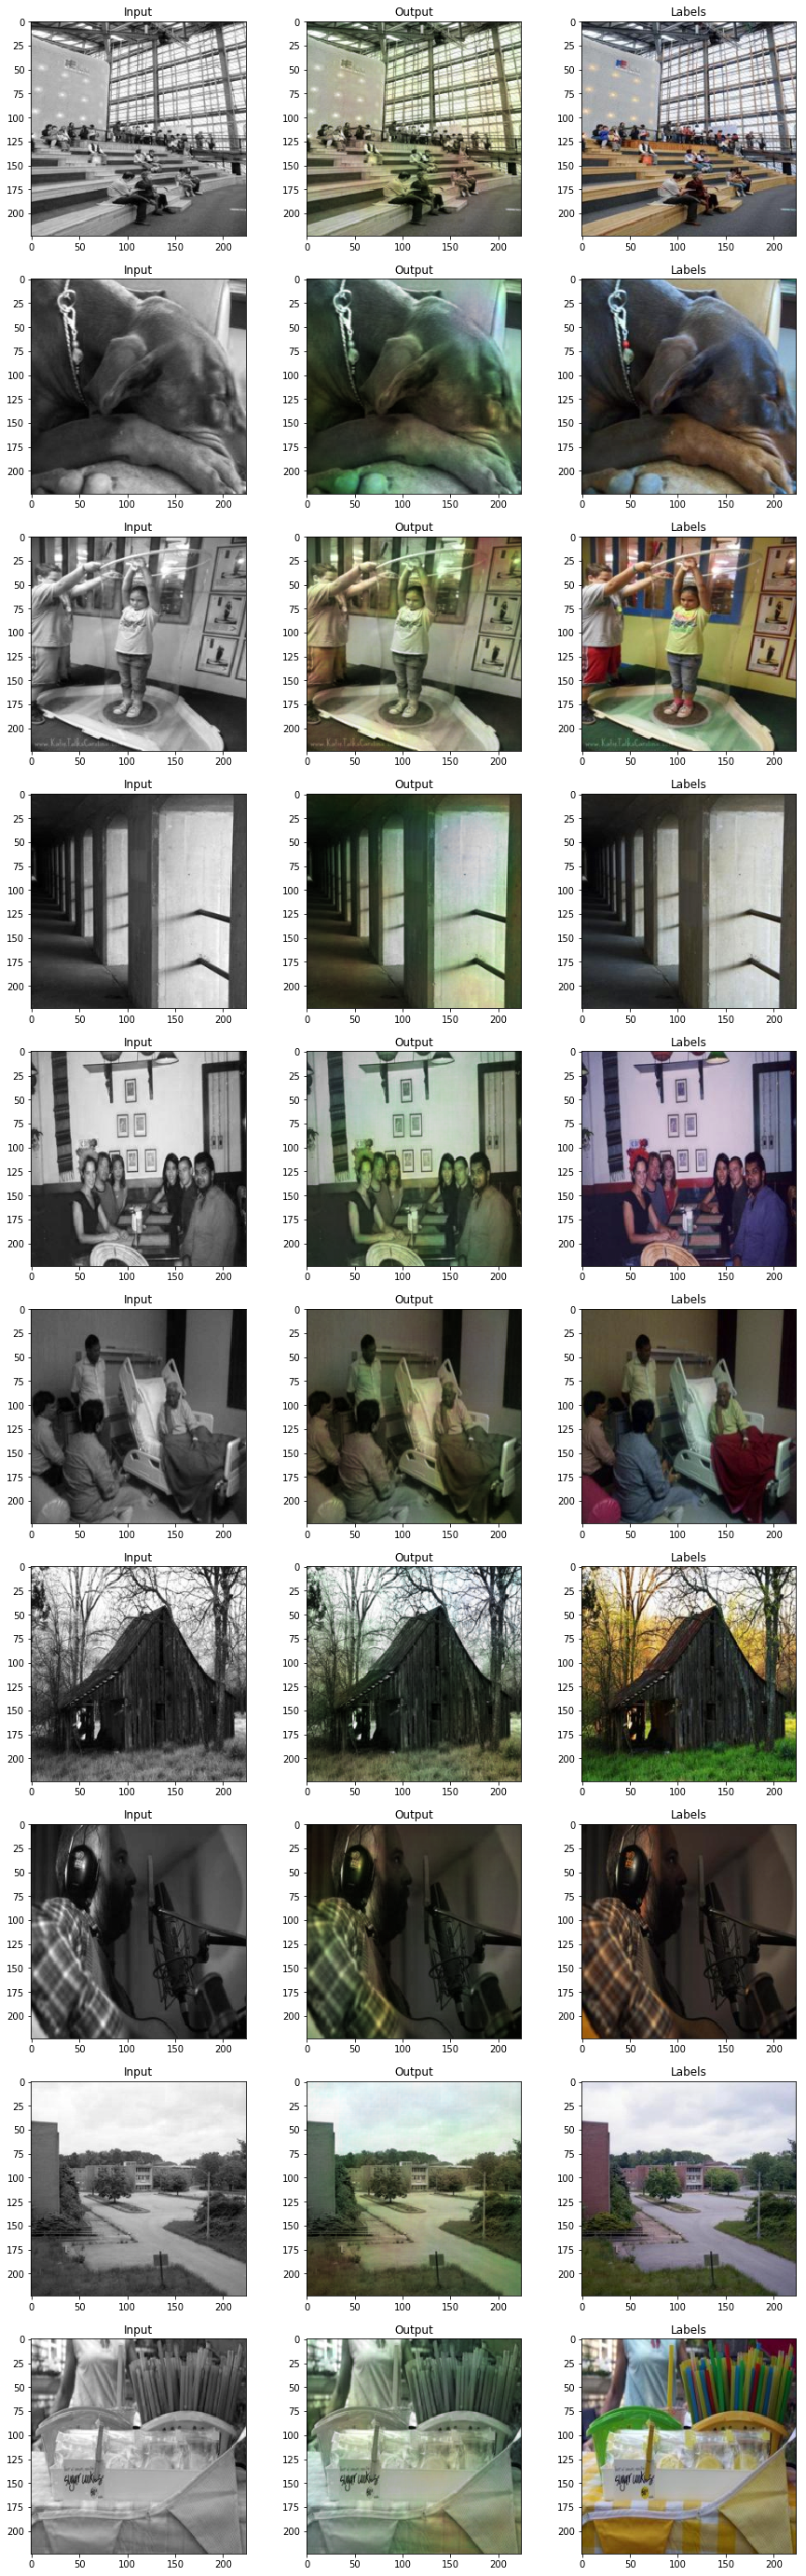

In [72]:
fig = plt.figure(figsize=(15, 15/3*len(grays)))
columns = 3
rows = len(grays)
show = []


for i in range(0, len(grays)):
    show.append( fig.add_subplot(rows, columns, i*3+1) )
    show[i*3].set_title("Input")  # set title
    plt.imshow(grays[i], cmap='gray')

    show.append( fig.add_subplot(rows, columns, i*3+2) )
    show[i*3+1].set_title("Output") 
    plt.imshow(predicts[i])

    show.append( fig.add_subplot(rows, columns, i*3+3) )
    show[i*3+2].set_title("Labels")
    plt.imshow(originals[i])

plt.show()